In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as sint
import pandas as pd
from scipy.signal import find_peaks

import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 13 ,
    'xtick.top' : True ,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 13 ,
    'ytick.right' : True ,
    'axes.labelsize' : 16,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight'
})

In [2]:
def gauss(x, a, b, c, d):
    return a*np.exp(-(x-b)**2/(2*c**2)) + d

In [3]:
II = ['Cn', 'In', 'Cc', 'Ic', 'Cbg', 'Ibg']
p = pd.read_excel('PE7data.xlsx', names=II)

calib1 = np.zeros((4,2))
calib2 = np.zeros((3,2))

[ 650.83764131 1193.93057775   26.87347056   44.81680848] [35.17574529  0.07655893  0.08677071  2.99478446]
[152.82258231 233.246528   -10.09450258 114.40139814] [45.51686981  0.26127359  0.2716024   1.19905018]
[ 130.13968523 2265.1462225   -31.02879384    2.65202043] [1.10132032 0.08265744 0.08513485 0.02178815]


Text(0, 0.5, 'Impulse')

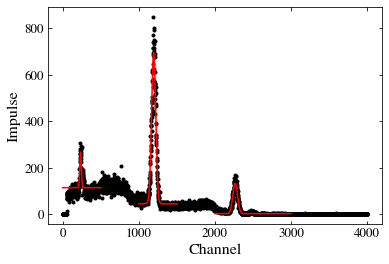

In [4]:
plt.plot(p.Cn, p.In, 'k.')

c, ccov = curve_fit(gauss,
                    p.Cn[1000:1500], p.In[1000:1500], p0=[10000, 1200, 30, 40])
plt.plot(p.Cn[1000:1500], gauss(p.Cn[1000:1500], (*c)), 'r-')
calib1[0] = c[1:3]
print(c, np.diag(ccov))

c, ccov = curve_fit(gauss,
                    p.Cn[200:700], p.In[200:700], p0=[6000, 200, 20, 80])
plt.plot(p.Cn[:500], gauss(p.Cn[:500], (*c)), 'r-')
calib2[0] = c[1:3]
print(c, np.diag(ccov))

c, ccov = curve_fit(gauss,
                    p.Cn[2000:4000], p.In[2000:4000], p0=[10000, 2200, 30, 5])
plt.plot(p.Cn[2000:3000], gauss(p.Cn[2000:3000], (*c)), 'r-')
calib1[1] = c[1:3]
print(c, np.diag(ccov))

plt.xlabel('Channel')
plt.ylabel('Impulse')

[ 834.23250011 1416.09867006   26.76227776   34.71518778] [52.3546829   0.06944043  0.07663711  3.49650498]
[449.45840501 100.6841856    7.52972065  74.30913688] [2.94431810e+02 1.07189761e-01 1.16132594e-01 1.59331798e+01]
[132.2456223  228.0866666   10.25658338 124.44809491] [45.94784589  0.36286479  0.37812677  1.22534788]


Text(0, 0.5, 'Impulse')

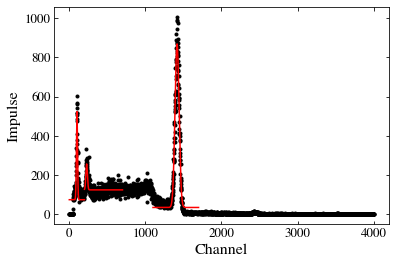

In [5]:
plt.plot(p.Cc, p.Ic, 'k.')

c, ccov = curve_fit(gauss,
                    p.Cc[1100:1700], p.Ic[1100:1700], p0=[10000, 1400, 30, 40])
plt.plot(p.Cc[1100:1700], gauss(p.Cc[1100:1700], (*c)), 'r-')
calib1[2] = c[1:3]
print(c, np.diag(ccov))

c, ccov = curve_fit(gauss,
                    p.Cc[:200], p.Ic[:200], p0=[7000, 100, 5, 100])
plt.plot(p.Cc[:200], gauss(p.Cc[:200], (*c)), 'r-')
calib1[3] = c[1:3]
print(c, np.diag(ccov))

c, ccov = curve_fit(gauss,
                    p.Cc[200:700], p.Ic[200:700], p0=[4000, 200, 10, 100])
plt.plot(p.Cc[200:700], gauss(p.Cc[200:700], (*c)), 'r-')
calib2[1] = c[1:3]
print(c, np.diag(ccov))

plt.xlabel('Channel')
plt.ylabel('Impulse')

[ 31.14895164 232.1686195   17.35653189  18.44164414] [4.65690356 1.88111105 2.02306818 0.22853848]


Text(0, 0.5, 'Impulse')

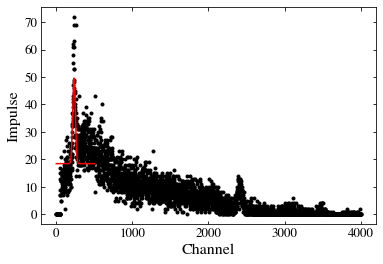

In [6]:
plt.plot(p.Cbg, p.Ibg, 'k.')

c, ccov = curve_fit(gauss,
                    p.Cbg[:500], p.Ibg[:500], p0=[1000, 200, 20, 20])
plt.plot(p.Cbg[:500], gauss(p.Cbg[:500], (*c)), 'r-')
calib2[2] = c[1:3]
print(c, np.diag(ccov))

plt.xlabel('Channel')
plt.ylabel('Impulse')

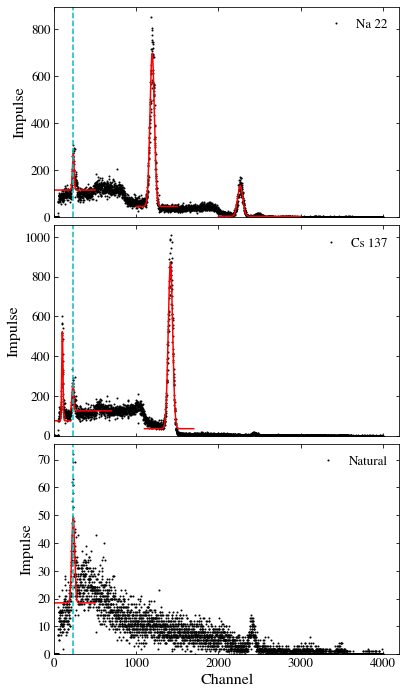

In [7]:
fig, ax = plt.subplots(3,1, figsize=(6, 10), sharex = True)

ax[0].plot(p.Cn, p.In, 'k.', ms=2, label='Na 22')
c, ccov = curve_fit(gauss,
                    p.Cn[1000:1500], p.In[1000:1500], p0=[10000, 1200, 30, 40])
ax[0].plot(p.Cn[1000:1500], gauss(p.Cn[1000:1500], (*c)), 'r-')
c, ccov = curve_fit(gauss,
                    p.Cn[200:700], p.In[200:700], p0=[6000, 200, 20, 80])
ax[0].plot(p.Cn[:500], gauss(p.Cn[:500], (*c)), 'r-')
c, ccov = curve_fit(gauss,
                    p.Cn[2000:4000], p.In[2000:4000], p0=[10000, 2200, 30, 5])
ax[0].plot(p.Cn[2000:3000], gauss(p.Cn[2000:3000], (*c)), 'r-')

ax[1].plot(p.Cc, p.Ic, 'k.', ms=2, label='Cs 137')
c, ccov = curve_fit(gauss,
                    p.Cc[1100:1700], p.Ic[1100:1700], p0=[10000, 1400, 30, 40])
ax[1].plot(p.Cc[1100:1700], gauss(p.Cc[1100:1700], (*c)), 'r-')
c, ccov = curve_fit(gauss,
                    p.Cc[:200], p.Ic[:200], p0=[7000, 100, 5, 100])
ax[1].plot(p.Cc[:200], gauss(p.Cc[:200], (*c)), 'r-')
c, ccov = curve_fit(gauss,
                    p.Cc[200:700], p.Ic[200:700], p0=[4000, 200, 10, 100])
ax[1].plot(p.Cc[200:700], gauss(p.Cc[200:700], (*c)), 'r-')

ax[2].plot(p.Cbg, p.Ibg, 'k.', ms=2, label='Natural')
c, ccov = curve_fit(gauss,
                    p.Cbg[:500], p.Ibg[:500], p0=[1000, 200, 20, 20])
ax[2].plot(p.Cbg[:500], gauss(p.Cbg[:500], (*c)), 'r-')

ax[2].set_xlabel('Channel')
ax[0].set_ylabel('Impulse')
ax[1].set_ylabel('Impulse')
ax[2].set_ylabel('Impulse')

for ax in ax.flat:
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.legend()
    ax.axvline(230, c='c', ls='--')

plt.tight_layout(h_pad=0.1, pad=2)
plt.savefig('7_1.png')

[1.20294717e-04 2.90492683e-01 8.50819166e-01] [1.08447336e-10 6.37853184e-04 1.84921462e+02]
0.9998208198662548


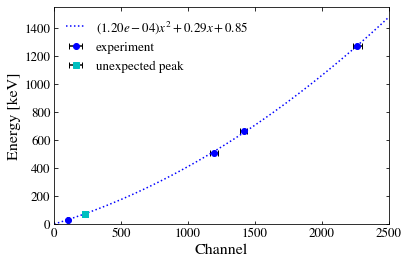

In [8]:
def poly_2(x, a, b, c):
    return a*x**2 + b*x + c
def Rsquare(list_e, list_t):
    return 1 - np.sum((list_e - list_t)**2) / np.sum((list_e - np.average(list_e))**2)

E1 = [511,1275,662,32]
cpoly, ccov = curve_fit(poly_2, calib1[:,0], E1)
print(cpoly, np.diag(ccov))
print(Rsquare(E1, poly_2(calib1[:,0], *cpoly)))
plt.errorbar(calib1[:, 0], E1, xerr=calib1[:,1], 
             marker='o', color='b', linestyle="", capsize=3, ecolor='k', label='experiment')

xx = np.linspace(0, 2500)
txt = r'$(%.2e) x^2 + %.2f x + %.2f$' %(cpoly[0], cpoly[1], cpoly[2])
plt.plot(xx, poly_2(xx, *cpoly), 'b:',label=txt)
plt.errorbar(calib2[:,0], poly_2(calib2[:,0], *cpoly), xerr = calib2[:,1], 
             marker='s', color='c', linestyle="", capsize=3, ecolor='k', label='unexpected peak')
plt.legend()
plt.xlim(0, 2500)
plt.ylim(0)
plt.xlabel('Channel')
plt.ylabel('Energy [keV]')
plt.savefig('7_2_calib.png')

In [9]:
print(calib2[:,0])
print(poly_2(calib2[:,0], *cpoly))
print(np.average(poly_2(calib2[:,0], *cpoly)), np.sqrt(np.sum(calib2[:,1]**2))/3)

[233.246528  228.0866666 232.1686195]
[75.15173571 73.36648234 74.77826234]
74.43216013057798 7.51550755445886


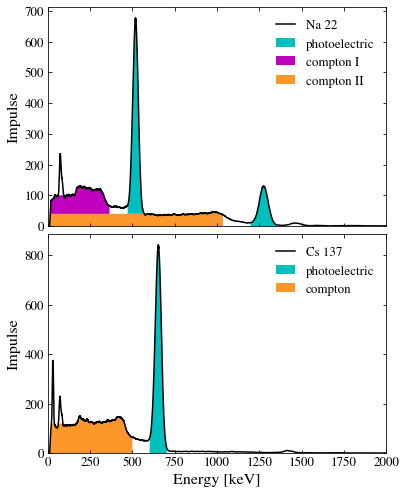

In [13]:
fig, ax = plt.subplots(2,1, figsize=(6, 7.2), sharex = True)

ax[0].plot(poly_2(p.Cn, *cpoly), smooth(p.In, 25), 'k-', label='Na 22')
wl, wr = 2265 - 3*31, 2265 + 3*31
x = poly_2(p.Cn[wl:wr],*cpoly)
y = smooth(p.In, 25)[wl:wr]
ax[0].fill_between(x, 0, y, facecolor='c', label='photoelectric')

wl, wr = 1194 - 3*27, 1194 + 3*27
peak, _ = find_peaks(smooth(p.In, 25)[600:wl],height=100,distance=50)
x = poly_2(p.Cn[:peak[-1]+700],*cpoly)
y = smooth(p.In, 25)[:peak[-1]+700]
y[y>130] = 100
ax[0].fill_between(x, 0, y, facecolor='m', label='compton I')

wl, wr = 2265 - 3*31, 2265 + 3*31
peak, _ = find_peaks(smooth(p.In, 25)[1800:wl],height=25,distance=50)
x = poly_2(p.Cn[:peak[-1]+1800],*cpoly)
y = smooth(p.In, 25)[:peak[-1]+1800]
y[y>45] = 40
ax[0].fill_between(x, 0, y, facecolor='#fc972b', label='compton II')

wl, wr = 1194 - 3*27, 1194 + 3*27
x = poly_2(p.Cn[wl:wr],*cpoly)
y = smooth(p.In, 25)[wl:wr]
ax[0].fill_between(x, 40, y, facecolor='c')


ax[1].plot(poly_2(p.Cc, *cpoly), smooth(p.Ic, 25), 'k-', label='Cs 137')
wl, wr = 1416 - 3*27, 1416 + 3*27
x = poly_2(p.Cc[wl:wr],*cpoly)
y = smooth(p.Ic, 25)[wl:wr]
ax[1].fill_between(x, 0, y, facecolor='c', label='photoelectric')
peak, _ = find_peaks(smooth(p.Ic, 25)[900:wl],height=120,distance=50)
x = poly_2(p.Cc[:peak[-1]+1000], *cpoly)
y = smooth(p.Ic, 25)[:peak[-1]+1000]
y[y>150] = 120
ax[1].fill_between(x, 0, y, facecolor='#fc972b', label='compton')

ax[1].set_xlabel('Energy [keV]')

for ax in ax.flat:
    ax.set_xlim(0,2000)
    ax.set_ylim(0)
    ax.legend()
    ax.set_ylabel('Impulse')
plt.tight_layout(h_pad=0.1, pad=2)
plt.savefig('7_3.png')

In [11]:
def smooth(y, pt):
    box = np.ones(pt)/pt
    return np.convolve(y, box, mode='same')

wl, wr = 2265 - 3*31, 2265 + 3*31
x = poly_2(p.Cn[wl:wr],*cpoly)
y = smooth(p.In, 25)[wl:wr]
pe_na_3 = sint.simps(y, x, 1)
peak, _ = find_peaks(smooth(p.In, 25)[1800:wl],height=25,distance=50)
x = poly_2(p.Cn[:peak[-1]+1800],*cpoly)
y = smooth(p.In, 25)[:peak[-1]+1800]
y[y>45] = 40
comp_na_3 = sint.simps(y, x, 1)
print("1275:", pe_na_3, comp_na_3)

wl, wr = 1194 - 3*27, 1194 + 3*27
base = 40
x = poly_2(p.Cn[wl:wr],*cpoly)
y = smooth(p.In, 25)[wl:wr]-base
pe_na_2 = sint.simps(y, x, 1)
peak, _ = find_peaks(smooth(p.In, 25)[600:wl],height=100,distance=50)
x = poly_2(p.Cn[:peak[-1]+700],*cpoly)
y = smooth(p.In, 25)[:peak[-1]+700]-base
y[y>130-base] = 100-base
y[y<0] = 0 
comp_na_2 = sint.simps(y, x, 1)
print("511:", pe_na_2, comp_na_2)

wl, wr = 1416 - 3*27, 1416 + 3*27
x = poly_2(p.Cc[wl:wr],*cpoly)
y = smooth(p.Ic, 25)[wl:wr]
pe_cs_3 = sint.simps(y, x, 1)
peak, _ = find_peaks(smooth(p.Ic, 25)[900:wl],height=120,distance=50)
x = poly_2(p.Cc[:peak[-1]+1000], *cpoly)
y = smooth(p.Ic, 25)[:peak[-1]+1000]
y[y>150] = 120
comp_cs_3 = sint.simps(y, x, 1)
print("662:", pe_cs_3, comp_cs_3)

1275: 8917.339954805602 40322.0624328512
511: 25670.910615371602 23348.589545989173
662: 38562.31872442013 58985.56697409236


[ 31.14895164 232.1686195   17.35653189  18.44164414] [1.08447336e-10 6.37853184e-04 1.84921462e+02]


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


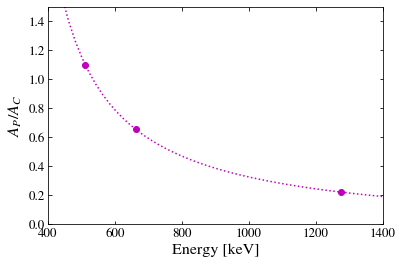

In [12]:
def poly_inv(x, a, b, c):
    return a/(x-b)+c
print(c, np.diag(ccov))
E = np.array([511, 662, 1275])
delta = np.array([pe_na_2/comp_na_2, pe_cs_3/comp_cs_3, pe_na_3/comp_na_3])

c,ccov = curve_fit(poly_inv, E, delta, p0 = [1000, 0, 0])


xx = np.linspace(400, 1400)
plt.plot(E,delta, 'mo')
plt.plot(xx, poly_inv(xx, *c), 'm:')
plt.ylim(0, 1.5)
plt.xlim(400, 1400)
plt.xlabel('Energy [keV]')
plt.ylabel(r'$A_P/A_C$')
plt.savefig('7_4_ratio.png')

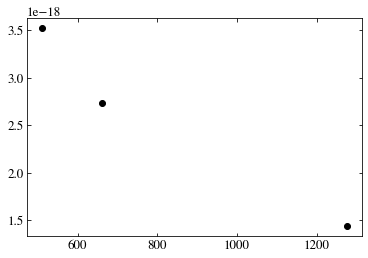

In [13]:
c = 2.99792 * 1e8
me = 9.10938 * 1e-31
x = E/(me*c**2)*1e3
sig_c = 3/4*(1+x)/x**3*(2*x*(1+x)/(1+2*x)-np.log(1+2*x)) + 0.5*np.log(1+2*x)/x - (1+3*x)/(1+2*x)**2
plt.plot(E, sig_c, 'ko')

C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


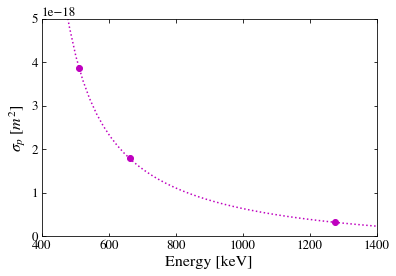

In [14]:
sig_p = sig_c * delta
plt.plot(E, sig_p, 'mo')
c,ccov = curve_fit(poly_inv, E, sig_p)
plt.plot(xx, poly_inv(xx, *c), 'm:')
plt.xlim(400, 1400)
plt.ylim(0, 5e-18)
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\sigma_p \;[m^2]$')
plt.savefig('7_5_cross.png')